In [ ]:
import sys
import os
import pickle

PROJECT_PATH = '/content/drive/MyDrive/tfc-sr'
sys.path.append(PROJECT_PATH)

In [ ]:
import matplotlib.pyplot as plt

def load_results(filepath):
    """Loads a results dictionary from a file using pickle."""
    with open(filepath, 'rb') as f:
        results = pickle.load(f)
    print(f"Results loaded from {filepath}")
    return results

def plot_results(results_dict, title="Continual Learning Performance on Split MNIST"):
    """
    Plots the average accuracy curves for multiple experiments.

    Args:
    - results_dict (dict): A dictionary where keys are experiment names (e.g., 'Baseline')
                           and values are the list/array of accuracies per task.
    """
    plt.figure(figsize=(10, 6))

    for experiment_name, accuracies in results_dict.items():
        # The x-axis represents the number of tasks learned (1 through 5)
        tasks = range(1, len(accuracies) + 1)
        plt.plot(tasks, accuracies, marker='o', linestyle='-', label=experiment_name)

    plt.title(title)
    plt.xlabel("Number of Tasks Learned")
    plt.ylabel("Average Accuracy on All Seen Tasks (%)")
    plt.xticks(range(1, len(next(iter(results_dict.values()))) + 1)) # Ensure integer ticks for tasks
    plt.ylim(0, 101) # Accuracy is between 0 and 100
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


In [ ]:
def print_accuracy_results(results_dict):
    """
    Prints the average accuracy for multiple experiments.

    Args:
    - results_dict (dict): A dictionary where keys are experiment names (e.g., 'Baseline')
                           and values are the list/array of accuracies per task.
    """
    print("\n")

    for experiment_name, accuracies in results_dict.items():
        print(f"Accuracies for {experiment_name}:")

        for i in range(len(accuracies)):
            print(f"  Task {i + 1}: {accuracies[i]}")
        print(f"  Average: {sum(accuracies) / len(accuracies)}\n")

In [ ]:
RESULTS_DIR = os.path.join(PROJECT_PATH, 'results')

I. TFC-SR vs all (MNIST)
--- Generating Plot for Split MNIST Results ---
Results loaded from /content/drive/MyDrive/tfc-sr/results/baseline_accuracies.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/er_accuracies.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/ewc_accuracies.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/si_accuracies.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_accuracies.pkl


Accuracies for Baseline:
  Task 1: 100.0
  Task 2: 51.42717736033179
  Task 3: 16.44064958982086
  Task 4: 12.308465209746295
  Task 5: 10.28
  Average: 38.09125843197979

Accuracies for EWC:
  Task 1: 100.0
  Task 2: 51.451573554525496
  Task 3: 31.341034655951784
  Task 4: 25.332830946998243
  Task 5: 20.37
  Average: 45.699087831495106

Accuracies for SI:
  Task 1: 100.0
  Task 2: 57.03830202488412
  Task 3: 52.9214799933032
  Task 4: 42.30092941471992
  Task 5: 32.58
  Average: 56.96814228658144

Accuracies for Standard ER:


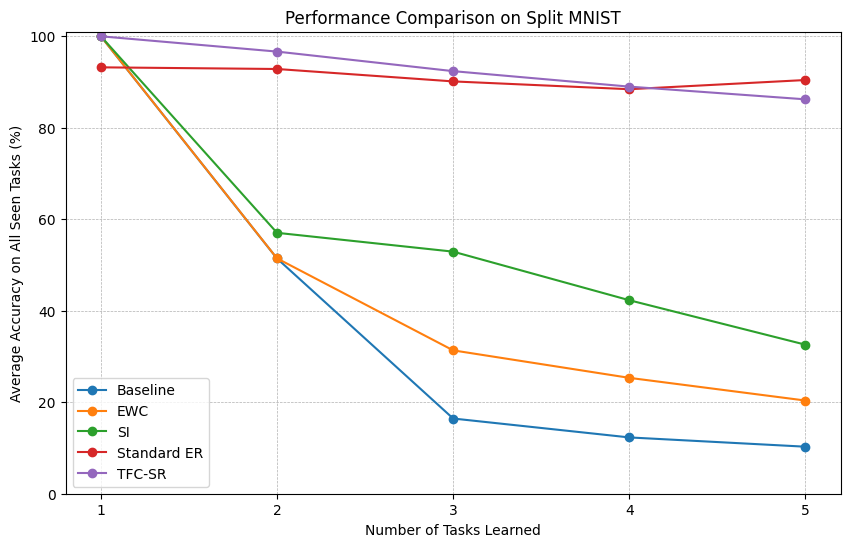

In [ ]:
print("I. TFC-SR vs all (MNIST)")
print("--- Generating Plot for Split MNIST Results ---")

# Load all the "best" results from MNIST experiments
baseline_mnist = load_results(os.path.join(RESULTS_DIR, 'baseline_accuracies.pkl'))
er_mnist = load_results(os.path.join(RESULTS_DIR, 'er_accuracies.pkl'))
ewc_mnist = load_results(os.path.join(RESULTS_DIR, 'ewc_accuracies.pkl'))
si_mnist = load_results(os.path.join(RESULTS_DIR, 'si_accuracies.pkl'))
tfc_mnist = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_accuracies.pkl'))

# Assemble the dictionary for plotting
mnist_plot_data = {
    'Baseline': baseline_mnist,
    'EWC': ewc_mnist,
    'SI': si_mnist,
    'Standard ER': er_mnist,
    'TFC-SR': tfc_mnist
}

print_accuracy_results(mnist_plot_data)

# Generate the plot
# We consider the accuracy on the last task as general accuracy on all seen tasks
plot_results(mnist_plot_data, title="Performance Comparison on Split MNIST")

II. TFC-SR vs all (CIFAR)
Results loaded from /content/drive/MyDrive/tfc-sr/results/baseline_cifar_results.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/er_cifar_results.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/ewc_cifar_best.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/si_cifar_best.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_cifar_best.pkl


Accuracies for Baseline:
  Task 1: 76.0
  Task 2: 42.45
  Task 3: 23.9
  Task 4: 16.975
  Task 5: 12.36
  Task 6: 12.8
  Task 7: 10.685714285714285
  Task 8: 8.7
  Task 9: 9.044444444444444
  Task 10: 7.27
  Average: 22.018515873015875

Accuracies for EWC:
  Task 1: 79.0
  Task 2: 38.0
  Task 3: 23.1
  Task 4: 15.5
  Task 5: 10.46
  Task 6: 11.9
  Task 7: 9.4
  Task 8: 7.9
  Task 9: 8.38888888888889
  Task 10: 6.16
  Average: 20.98088888888889

Accuracies for SI:
  Task 1: 79.0
  Task 2: 42.3
  Task 3: 25.2
  Task 4: 18.15
  Task 5: 14.16
  Task 6: 13.75
  Task 7: 11.8

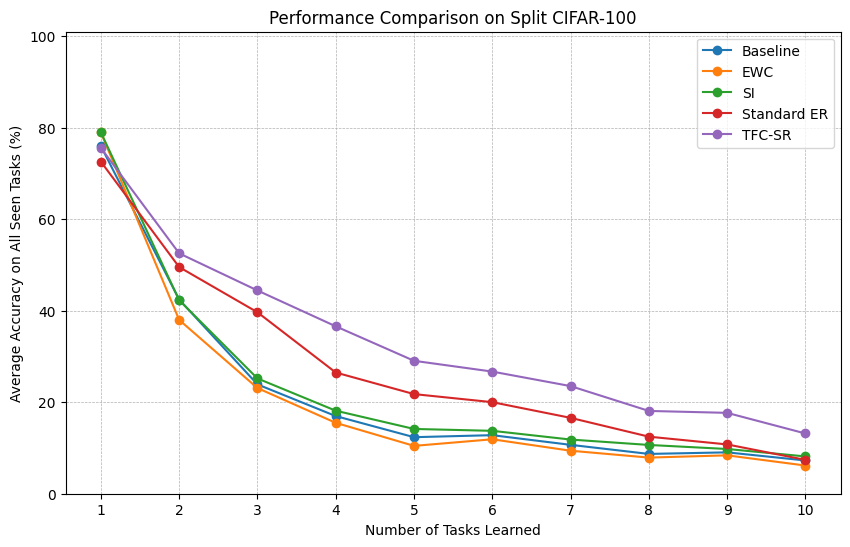

In [ ]:
print("II. TFC-SR vs all (CIFAR)")
# Load all the "best" results from CIFAR experiments
baseline_mnist = load_results(os.path.join(RESULTS_DIR, 'baseline_cifar_results.pkl'))
er_mnist = load_results(os.path.join(RESULTS_DIR, 'er_cifar_results.pkl'))
ewc_mnist = load_results(os.path.join(RESULTS_DIR, 'ewc_cifar_best.pkl'))
si_mnist = load_results(os.path.join(RESULTS_DIR, 'si_cifar_best.pkl'))
tfc_mnist = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_cifar_best.pkl'))

# Assemble the dictionary for plotting
cifar_plot_data = {
    'Baseline': baseline_mnist['accuracies'],
    'EWC': ewc_mnist['accuracies'],
    'SI': si_mnist['accuracies'],
    'Standard ER': er_mnist['accuracies'],
    'TFC-SR': tfc_mnist['accuracies'],
}

print_accuracy_results(cifar_plot_data)
plot_results(cifar_plot_data, title="Performance Comparison on Split CIFAR-100")

III. TFC-SR Sensitity to Mastery Threshold (CIFAR)

--- Generating Sensitivity Analysis Plot for Mastery Threshold ---
Results loaded from /content/drive/MyDrive/tfc-sr/results/er_cifar_results.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_99_thresh_cifar.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_cifar_all_trials.pkl
(10.0, {'accuracies': [75.6, 52.55, 44.43333333333333, 36.6, 29.06, 26.7, 23.52857142857143, 18.1, 17.677777777777777, 13.17], 'total_replay_batches': 15800, 'memory_checks': 50, 'schedule_history': []})
(20.0, {'accuracies': [75.6, 52.55, 44.43333333333333, 36.6, 29.06, 26.7, 23.52857142857143, 18.1, 17.677777777777777, 13.17], 'total_replay_batches': 15800, 'memory_checks': 50, 'schedule_history': []})
(30.0, {'accuracies': [75.6, 52.55, 44.43333333333333, 36.6, 29.06, 26.7, 23.52857142857143, 18.1, 17.677777777777777, 13.17], 'total_replay_batches': 15800, 'memory_checks': 50, 'schedule_history': []})
(50.0, {'accuracies

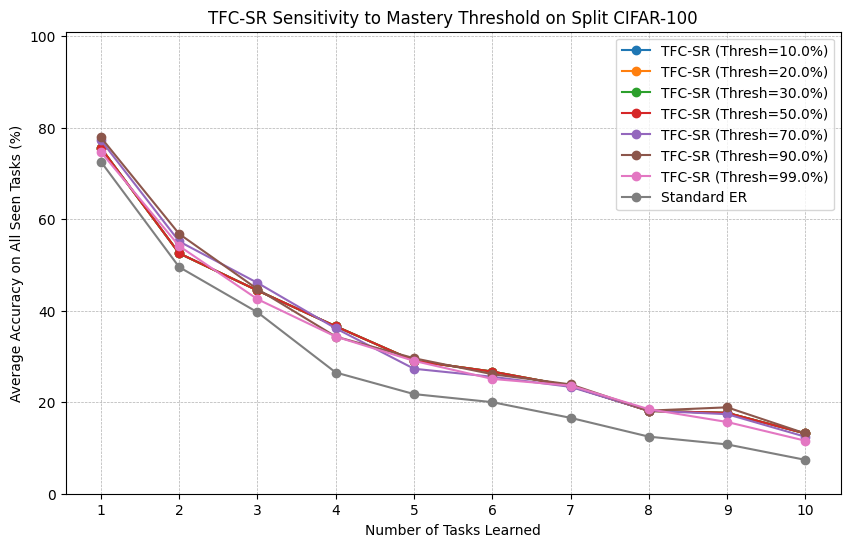

In [ ]:
print("III. TFC-SR Sensitity to Mastery Threshold (CIFAR)")
# Plot the Sensitivity Analysis
print("\n--- Generating Sensitivity Analysis Plot for Mastery Threshold ---")
# Load ER results to use as a reference line
er_cifar_results = load_results(os.path.join(RESULTS_DIR, 'er_cifar_results.pkl'))
tfc_99_cifar_results = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_99_thresh_cifar.pkl'))
all_tfc_cifar_results = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_cifar_all_trials.pkl'))
sensitivity_plot_data = {f'TFC-SR (Thresh={t}%)': res['accuracies'] for t, res in all_tfc_cifar_results.items()}
sensitivity_plot_data['TFC-SR (Thresh=99.0%)'] = tfc_99_cifar_results['accuracies']
sensitivity_plot_data['Standard ER'] = er_cifar_results['accuracies']

print(*all_tfc_cifar_results.items(), sep="\n")
print(tfc_99_cifar_results)

print_accuracy_results(sensitivity_plot_data)

plot_results(sensitivity_plot_data, title="TFC-SR Sensitivity to Mastery Threshold on Split CIFAR-100")

In [ ]:
print("IV. TFC-SR Sensitity to Buffer size (CIFAR)")

# Plot the Sensitivity Analysis
print("\n--- Generating Sensitivity Analysis Plot for buffer size ---")

# Load ER results to use as a reference line
er_cifar_buffer_tuning_results = load_results(os.path.join(RESULTS_DIR, 'er_cifar_buffer_tuning_ALL.pkl'))
tfc_sr_cifar_buffer_tuning_results = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_cifar_buffer_tuning_ALL.pkl'))

print("Standard ER: ", er_cifar_buffer_tuning_results)
print("TFC-SR: ",tfc_sr_cifar_buffer_tuning_results)

sensitivity_plot_data_er = {f'Standard ER (Buffer size={t})': res['accuracies'] for t, res in sorted(er_cifar_buffer_tuning_results.items())}
sensitivity_plot_data_tfc = {f'TFC-SR (Buffer size={t})': res['accuracies'] for t, res in sorted(tfc_sr_cifar_buffer_tuning_results.items())}
# sensitivity_plot_data = sensitivity_plot_data_tfc | sensitivity_plot_data_er
# print(sensitivity_plot_data)

# print_accuracy_results(sensitivity_plot_data)

# plot_results(sensitivity_plot_data, title="TFC-SR and Standard ER Sensitivity to Buffer size on Split CIFAR-100")

IV. TFC-SR Sensitity to Buffer size (CIFAR)

--- Generating Sensitivity Analysis Plot for buffer size ---
Results loaded from /content/drive/MyDrive/tfc-sr/results/er_cifar_buffer_tuning_ALL.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_cifar_buffer_tuning_ALL.pkl
Standard ER:  {100: {'accuracies': [77.7, 43.0, 32.5, 21.65, 16.8, 15.033333333333333, 12.5, 10.3875, 10.3, 8.51], 'total_replay_batches': 15800}, 500: {'accuracies': [75.7, 51.45, 39.5, 29.225, 23.02, 20.25, 18.514285714285716, 14.9625, 11.544444444444444, 9.31], 'total_replay_batches': 15800}, 2000: {'accuracies': [78.0, 59.95, 53.5, 42.175, 36.2, 32.6, 30.928571428571427, 26.1, 24.92222222222222, 21.37], 'total_replay_batches': 15800}, 1000: {'accuracies': [72.6, 49.55, 39.666666666666664, 26.5, 21.78, 20.016666666666666, 16.585714285714285, 12.475, 10.777777777777779, 7.4], 'total_replay_batches': 15800}}
TFC-SR:  {100: {'accuracies': [76.8, 46.2, 33.6, 22.325, 16.4, 15.3, 12.857142857142858, 10.625



Accuracies for Standard ER (Buffer size=100):
  Task 1: 77.7
  Task 2: 43.0
  Task 3: 32.5
  Task 4: 21.65
  Task 5: 16.8
  Task 6: 15.033333333333333
  Task 7: 12.5
  Task 8: 10.3875
  Task 9: 10.3
  Task 10: 8.51
  Average: 24.838083333333334

Accuracies for Standard ER (Buffer size=500):
  Task 1: 75.7
  Task 2: 51.45
  Task 3: 39.5
  Task 4: 29.225
  Task 5: 23.02
  Task 6: 20.25
  Task 7: 18.514285714285716
  Task 8: 14.9625
  Task 9: 11.544444444444444
  Task 10: 9.31
  Average: 29.347623015873012

Accuracies for Standard ER (Buffer size=1000):
  Task 1: 72.6
  Task 2: 49.55
  Task 3: 39.666666666666664
  Task 4: 26.5
  Task 5: 21.78
  Task 6: 20.016666666666666
  Task 7: 16.585714285714285
  Task 8: 12.475
  Task 9: 10.777777777777779
  Task 10: 7.4
  Average: 27.73518253968254

Accuracies for Standard ER (Buffer size=2000):
  Task 1: 78.0
  Task 2: 59.95
  Task 3: 53.5
  Task 4: 42.175
  Task 5: 36.2
  Task 6: 32.6
  Task 7: 30.928571428571427
  Task 8: 26.1
  Task 9: 24.9222

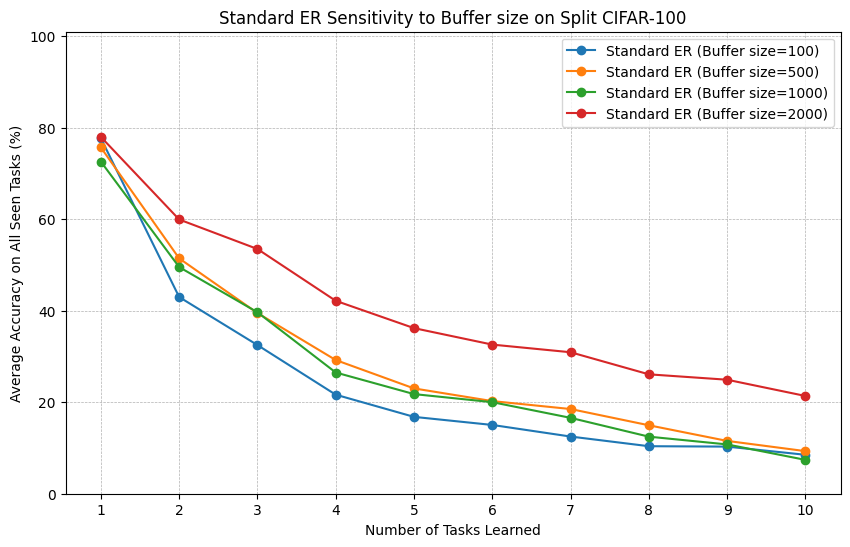

In [ ]:
print_accuracy_results(sensitivity_plot_data_er)
plot_results(sensitivity_plot_data_er, title="Standard ER Sensitivity to Buffer size on Split CIFAR-100")



Accuracies for TFC-SR (Buffer size=100):
  Task 1: 76.8
  Task 2: 46.2
  Task 3: 33.6
  Task 4: 22.325
  Task 5: 16.4
  Task 6: 15.3
  Task 7: 12.857142857142858
  Task 8: 10.625
  Task 9: 10.21111111111111
  Task 10: 8.55
  Average: 25.2868253968254

Accuracies for TFC-SR (Buffer size=500):
  Task 1: 76.3
  Task 2: 50.1
  Task 3: 40.9
  Task 4: 30.875
  Task 5: 25.14
  Task 6: 22.033333333333335
  Task 7: 18.37142857142857
  Task 8: 13.8125
  Task 9: 12.144444444444444
  Task 10: 9.48
  Average: 29.915670634920637

Accuracies for TFC-SR (Buffer size=1000):
  Task 1: 75.6
  Task 2: 52.55
  Task 3: 44.43333333333333
  Task 4: 36.6
  Task 5: 29.06
  Task 6: 26.7
  Task 7: 23.52857142857143
  Task 8: 18.1
  Task 9: 17.677777777777777
  Task 10: 13.17
  Average: 33.74196825396826

Accuracies for TFC-SR (Buffer size=2000):
  Task 1: 77.4
  Task 2: 59.75
  Task 3: 50.7
  Task 4: 39.6
  Task 5: 33.56
  Task 6: 31.85
  Task 7: 28.914285714285715
  Task 8: 22.925
  Task 9: 22.6
  Task 10: 19.

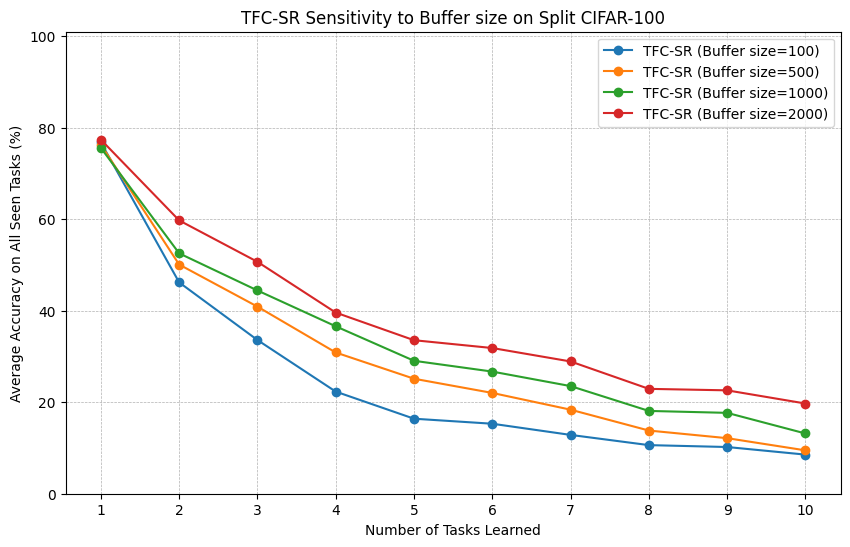

In [ ]:
print_accuracy_results(sensitivity_plot_data_tfc)
plot_results(sensitivity_plot_data_tfc, title="TFC-SR Sensitivity to Buffer size on Split CIFAR-100")

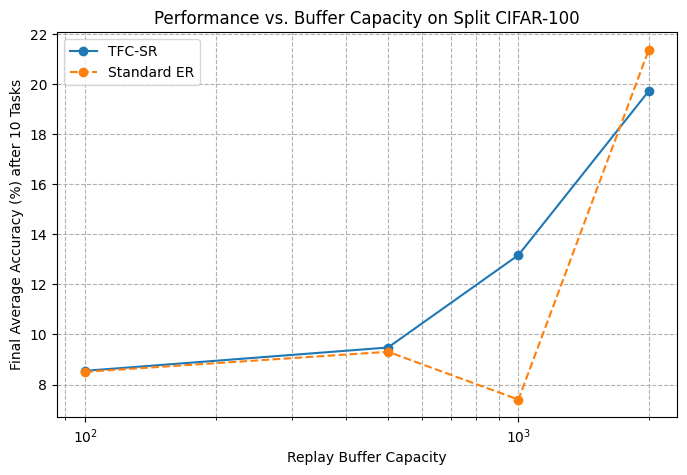

In [ ]:
# Get the final accuracy for each buffer size for both methods
sorted_capacities = sorted(tfc_sr_cifar_buffer_tuning_results .keys())
tfc_final_accuracies = [tfc_sr_cifar_buffer_tuning_results [cap]['accuracies'][-1] for cap in sorted_capacities]
er_final_accuracies = [er_cifar_buffer_tuning_results[cap]['accuracies'][-1] for cap in sorted_capacities]

plt.figure(figsize=(8, 5))
plt.plot(sorted_capacities, tfc_final_accuracies, marker='o', label='TFC-SR')
plt.plot(sorted_capacities, er_final_accuracies, marker='o', linestyle='--', label='Standard ER')
plt.title("Performance vs. Buffer Capacity on Split CIFAR-100")
plt.xlabel("Replay Buffer Capacity")
plt.ylabel("Final Average Accuracy (%) after 10 Tasks")
plt.xscale('log')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.show()

V. TFC-SR Stress Testing (CIFAR)
Results loaded from /content/drive/MyDrive/tfc-sr/results/baseline_cifar_results.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/er_cifar_buffer_tuning_ALL.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_cifar_best.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_99_thresh_cifar.pkl


Accuracies for Baseline:
  Task 1: 76.0
  Task 2: 42.45
  Task 3: 23.9
  Task 4: 16.975
  Task 5: 12.36
  Task 6: 12.8
  Task 7: 10.685714285714285
  Task 8: 8.7
  Task 9: 9.044444444444444
  Task 10: 7.27
  Average: 22.018515873015875

Accuracies for Standard ER:
  Task 1: 72.6
  Task 2: 49.55
  Task 3: 39.666666666666664
  Task 4: 26.5
  Task 5: 21.78
  Task 6: 20.016666666666666
  Task 7: 16.585714285714285
  Task 8: 12.475
  Task 9: 10.777777777777779
  Task 10: 7.4
  Average: 27.73518253968254

Accuracies for TFC-SR (threshold = 10.0):
  Task 1: 75.6
  Task 2: 52.55
  Task 3: 44.43333333333333
  Task 4: 36.6
  Tas

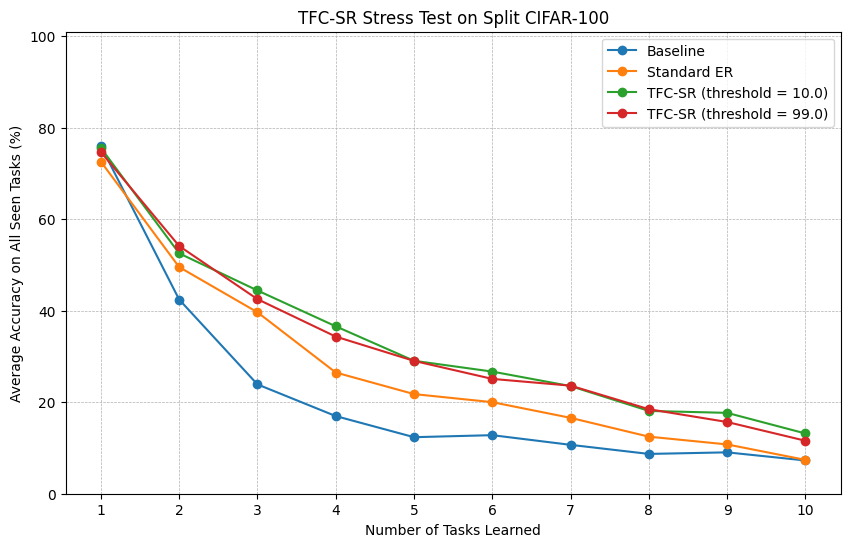

In [ ]:
print("V. TFC-SR Stress Testing (CIFAR)")


baseline_cifar_results = load_results(os.path.join(RESULTS_DIR, 'baseline_cifar_results.pkl'))
er_cifar_best_results = load_results(os.path.join(RESULTS_DIR, 'er_cifar_buffer_tuning_ALL.pkl'))[1000] # Use your best ER run
tfc_cifar_best_results = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_cifar_best.pkl'))
tfc_stress_results = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_99_thresh_cifar.pkl'))

results_to_plot = {
    'Baseline': baseline_cifar_results['accuracies'],
    'Standard ER': er_cifar_best_results['accuracies'],
    'TFC-SR (threshold = 10.0)': tfc_cifar_best_results['accuracies'],
    f'TFC-SR (threshold = 99.0)': tfc_stress_results['accuracies'],
}

print_accuracy_results(results_to_plot)

plot_results(results_to_plot, title="TFC-SR Stress Test on Split CIFAR-100")

VI. TFC-SR with Spaced Replay (CIFAR)
Results loaded from /content/drive/MyDrive/tfc-sr/results/baseline_cifar_results.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/er_cifar_buffer_tuning_ALL.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_cifar_best.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_spaced_replay_cifar.pkl


Accuracies for Baseline:
  Task 1: 76.0
  Task 2: 42.45
  Task 3: 23.9
  Task 4: 16.975
  Task 5: 12.36
  Task 6: 12.8
  Task 7: 10.685714285714285
  Task 8: 8.7
  Task 9: 9.044444444444444
  Task 10: 7.27
  Average: 22.018515873015875

Accuracies for Standard ER:
  Task 1: 72.6
  Task 2: 49.55
  Task 3: 39.666666666666664
  Task 4: 26.5
  Task 5: 21.78
  Task 6: 20.016666666666666
  Task 7: 16.585714285714285
  Task 8: 12.475
  Task 9: 10.777777777777779
  Task 10: 7.4
  Average: 27.73518253968254

Accuracies for TFC-SR:
  Task 1: 75.6
  Task 2: 52.55
  Task 3: 44.43333333333333
  Task 4: 36.6
  Task 5: 29.06
  

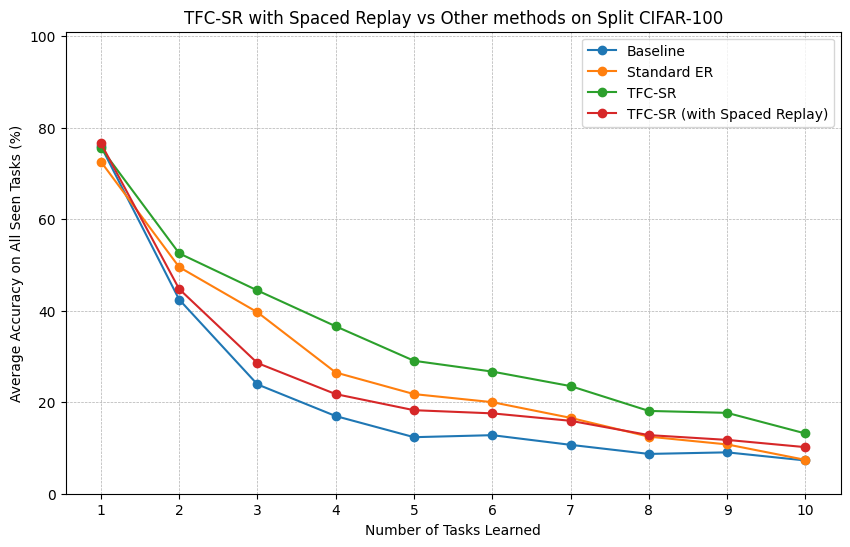

Results for Spaced Replay:
Total Replay Batches: 3555
Memory Checks: 45


In [ ]:
print("VI. TFC-SR with Spaced Replay (CIFAR)")

baseline_cifar_results = load_results(os.path.join(RESULTS_DIR, 'baseline_cifar_results.pkl'))
er_cifar_best_results = load_results(os.path.join(RESULTS_DIR, 'er_cifar_buffer_tuning_ALL.pkl'))[1000] # Use your best ER run
tfc_cifar_best_results = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_cifar_best.pkl'))
tfc_cifar_spaced_replay_results = load_results(os.path.join(RESULTS_DIR, 'tfc_spaced_replay_cifar.pkl'))

results_to_plot = {
    'Baseline': baseline_cifar_results['accuracies'],
    'Standard ER': er_cifar_best_results['accuracies'],
    'TFC-SR': tfc_cifar_best_results['accuracies'],
    f'TFC-SR (with Spaced Replay)': tfc_cifar_spaced_replay_results['accuracies'],
}

print_accuracy_results(results_to_plot)

plot_results(results_to_plot, title="TFC-SR with Spaced Replay vs Other methods on Split CIFAR-100")

print("Results for Spaced Replay:")
print(f"Total Replay Batches: {tfc_cifar_spaced_replay_results['total_replay_batches']}")
print(f"Memory Checks: {tfc_cifar_spaced_replay_results['memory_checks']}")

IV. Mastery Gated Progression (CIFAR)
Results loaded from /content/drive/MyDrive/tfc-sr/results/baseline_cifar_results.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/er_cifar_buffer_tuning_ALL.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/tfc_sr_cifar_best.pkl
Results loaded from /content/drive/MyDrive/tfc-sr/results/mgp_cifar.pkl


Accuracies for Baseline:
  Task 1: 76.0
  Task 2: 42.45
  Task 3: 23.9
  Task 4: 16.975
  Task 5: 12.36
  Task 6: 12.8
  Task 7: 10.685714285714285
  Task 8: 8.7
  Task 9: 9.044444444444444
  Task 10: 7.27
  Average: 22.018515873015875

Accuracies for Standard ER:
  Task 1: 72.6
  Task 2: 49.55
  Task 3: 39.666666666666664
  Task 4: 26.5
  Task 5: 21.78
  Task 6: 20.016666666666666
  Task 7: 16.585714285714285
  Task 8: 12.475
  Task 9: 10.777777777777779
  Task 10: 7.4
  Average: 27.73518253968254

Accuracies for TFC-SR:
  Task 1: 75.6
  Task 2: 52.55
  Task 3: 44.43333333333333
  Task 4: 36.6
  Task 5: 29.06
  Task 6: 26.7
 

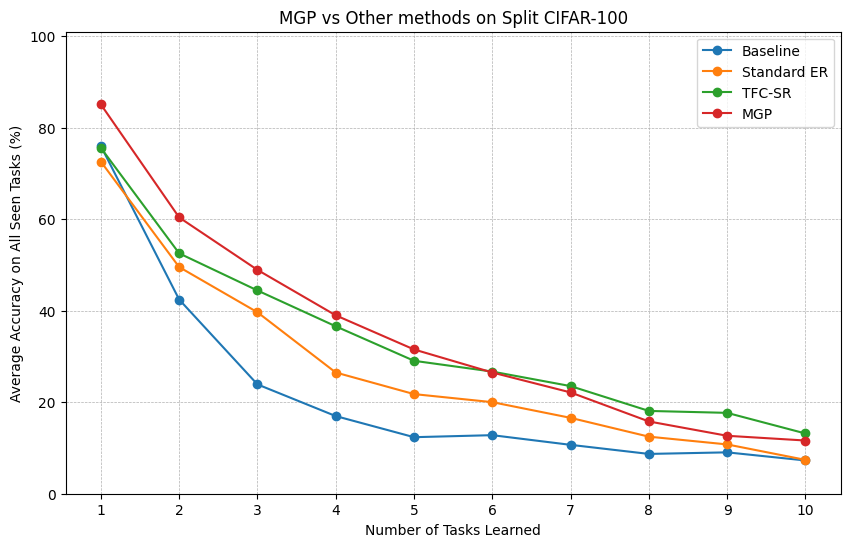


--- MGP Experiment Finished ---
Final Overall Accuracy: 11.63%
Epochs taken per task: [47, 9, 22, 50, 50, 9, 15, 18, 7, 19]


In [ ]:
print("IV. Mastery Gated Progression (CIFAR)")

baseline_cifar_results = load_results(os.path.join(RESULTS_DIR, 'baseline_cifar_results.pkl'))
er_cifar_best_results = load_results(os.path.join(RESULTS_DIR, 'er_cifar_buffer_tuning_ALL.pkl'))[1000] # Use your best ER run
tfc_cifar_best_results = load_results(os.path.join(RESULTS_DIR, 'tfc_sr_cifar_best.pkl'))
mgp_results = load_results(os.path.join(RESULTS_DIR, 'mgp_cifar.pkl'))

results_to_plot = {
    'Baseline': baseline_cifar_results['accuracies'],
    'Standard ER': er_cifar_best_results['accuracies'],
    'TFC-SR': tfc_cifar_best_results['accuracies'],
    f'MGP': mgp_results['accuracies'],
}

print_accuracy_results(results_to_plot)

plot_results(results_to_plot, title="MGP vs Other methods on Split CIFAR-100")

# --- Final Results ---
mgp_results['final_accuracy'] = mgp_results['accuracies'][-1]
print("\n--- MGP Experiment Finished ---")
print(f"Final Overall Accuracy: {mgp_results['final_accuracy']:.2f}%")
print(f"Epochs taken per task: {mgp_results['epochs_per_task']}")